In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,ConfusionMatrixDisplay

data = pd.read_csv('all-data.csv',
                   encoding='unicode_escape',
                   names=['Sentiment', 'Text'])

X = data['Text']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TfidfVectorizer

In [2]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred,average='weighted'))

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.57      0.68       110
     neutral       0.76      0.93      0.84       571
    positive       0.78      0.54      0.64       289

    accuracy                           0.77       970
   macro avg       0.80      0.68      0.72       970
weighted avg       0.78      0.77      0.76       970

Accuracy: 0.7731958762886598
f1_score 0.7614540958127863


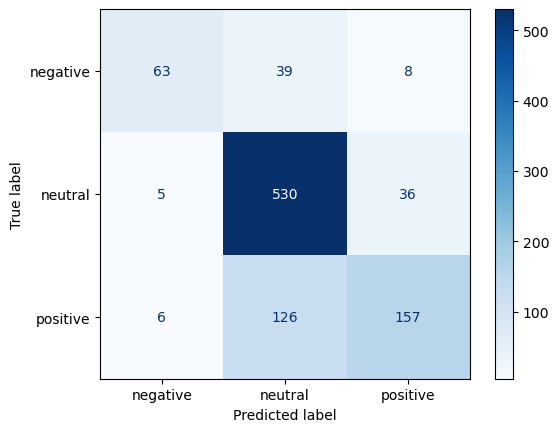

In [3]:
cm = confusion_matrix(y_test,y_pred)
labels = ["negative","neutral", "positive"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Using CountVectorizer

In [4]:
vectorizer = CountVectorizer()
X_train_countvector = vectorizer.fit_transform(X_train)
X_test_countvector = vectorizer.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_countvector, y_train)

y_pred = model.predict(X_test_countvector)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred,average='weighted'))

Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.63      0.65       110
     neutral       0.80      0.85      0.82       571
    positive       0.68      0.61      0.64       289

    accuracy                           0.75       970
   macro avg       0.72      0.70      0.70       970
weighted avg       0.75      0.75      0.75       970

Accuracy: 0.7515463917525773
f1_score 0.7483652660547022


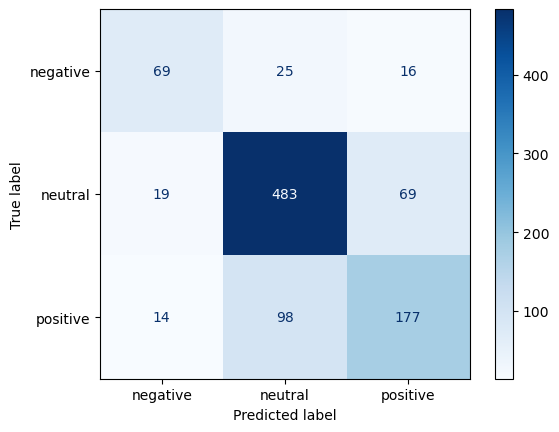

In [5]:
cm = confusion_matrix(y_test,y_pred)
labels = ["negative","neutral", "positive"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()